In [2]:
import json

import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [5]:
# Read Reviews
data_dir = 'D:\Coding\sandbox\Amzn_Stats\Amzn_data\Kitchen'
osp.isdir(data_dir)

product_type_ind = 1
product_types = ['Music', 'Kitchen', 'Pets']
dat_files = ['CDs_and_Vinyl_5', 'Prime_Pantry_5', 'Pet_Supplies_5']
meta_files = ['meta_CDs_and_Vinyl', 'meta_Prime_Pantry', 'meta_Pet_Supplies']

# Read Reviews File
with open(osp.join(data_dir, dat_files[product_type_ind] + '.json'),'r') as f:
    texts = f.readlines()

full_review = [json.loads(txt) for txt in texts]
print(full_review[0])

review_text = []
for fr in tqdm(full_review):
    try:
        review_text.append(fr['reviewText'])
    except:
        pass
print(f'Extracted {len(review_text)} text reviews')
print('First 5 reviews:')

for i, rt in enumerate(review_text[:5]):
    print(f'Review # {i}')
    print(rt)
    print('----------------------------- ')

{'overall': 4.0, 'verified': True, 'reviewTime': '09 24, 2015', 'reviewerID': 'A31Y9ELLA1JUB0', 'asin': 'B0000DIWNI', 'reviewerName': 'Her Royal Peepness Princess HoneyBunny Blayze', 'reviewText': "I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .\n\nThis is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.\n\nNow if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..", 'summary': 'Pretty Good For plastic Wrap', 'unixReviewTime': 1443052800}


100%|██████████| 137788/137788 [00:00<00:00, 3452193.20it/s]

Extracted 137611 text reviews
First 5 reviews:
Review # 0
I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .

This is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.

Now if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..
----------------------------- 
Review # 1
I am an avid cook and baker.  Saran Premium Plastic Wrap is a staple in my pantry and the only plastic wrap I purchase.  I have tried other brands including Glad and have consistently found Saran Wrap to be far superior.

Saran Wrap is easy to use.  It's cutting bar cuts the wrap smoothly and the end of the wrap is e

In [6]:
# Read Metadata
with open(osp.join(data_dir, meta_files[product_type_ind] + '.json'),'r') as f:
    texts = f.readlines()

meta_data_in_raw = [json.loads(txt) for txt in texts]
print(meta_data_in_raw[0])

asin_to_title = [[m['asin'], m['title']]for m in meta_data_in_raw]

{'category': [], 'tech1': '', 'description': ['Sink your sweet tooth into MILK DUDS Candya delicious blend of smooth milk chocolate and chewy caramel. These bite-sized candies are perfect for popping whether youre at home, on the go, or watching movies with friends. Stock up and always have a mouthwatering treat within reach.'], 'fit': '', 'title': "HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween Candy)", 'also_buy': ['B019KE37WO', 'B007NQSWEU'], 'tech2': '', 'brand': 'Milk Duds', 'feature': [], 'rank': [], 'also_view': [], 'details': {'ASIN: ': 'B00005BPJO', 'Item model number:': '1070002152'}, 'main_cat': '<img src="https://m.media-amazon.com/images/G/01/pantry/subnav/pantry-subnav-logo._CB474181323_.png" class="nav-categ-image" alt="Prime Pantry"/>', 'similar_item': '', 'date': '', 'price': '$5.00', 'asin': 'B00005BPJO', 'imageURL': ['https://images-na.ssl-images-amazon.com/images/I/51v07pI0ruL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/31MiXt54ZZL._SS40_.jpg', 'htt

In [7]:
asin_to_title = [[m['asin'], m['title']]for m in meta_data_in_raw]
asin_to_title[:10]

[['B00005BPJO', "HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween Candy)"],
 ['B00005BPJO', "HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween Candy)"],
 ['B0000DIF38', 'Goya Dry Lentils, 16 oz'],
 ['B0000DIWNI', 'Saran Premium Plastic Wrap, 100 Sq Ft'],
 ['B0000DIWNZ', 'Saran Cling Plus Plastic Wrap, 200 Sq Ft'],
 ['B0000GH6UG', 'Ibarra Mexican Chocolate, 19 oz'],
 ['B0000KC2BK', 'Knorr Granulated Bouillon, Chicken 15.9 oz'],
 ['B0001E1IN8', 'Castillo Habanero Hot Sauce Red, 5 oz'],
 ['B00032E8XK',
  'Chicken of the Sea, Solid White Albacore Tuna in Water, 5 Oz'],
 ['B0005XMTHE', "Smucker's Concord Grape Jam, 32 oz"]]

For Reviews:  <br>
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B <br>
asin - ID of the product, e.g. 0000013714 <br>
reviewerName - name of the reviewer <br>
vote - helpful votes of the review <br>
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover" <br>
reviewText - text of the review <br>
overall - rating of the product <br>
summary - summary of the review <br>
unixReviewTime - time of the review (unix time) <br>
reviewTime - time of the review (raw) <br>
image - images that users post after they have received the product <br>

For Metadata:  <br>
asin - ID of the product, e.g. 0000031852 <br>
title - name of the product <br>
feature - bullet-point format features of the product <br>
description - description of the product <br>
price - price in US dollars (at time of crawl) <br>
imageURL - url of the product image <br>
imageURL - url of the high resolution product image <br>
related - related products (also bought, also viewed, bought together, buy after viewing) <br>
salesRank - sales rank information <br>
brand - brand name <br>
categories - list of categories the product belongs to <br>
tech1 - the first technical detail table of the product <br>
tech2 - the second technical detail table of the product <br>
similar - similar product table <br>

In [8]:
# How many individual Products?
all_products = [fr['asin'] for fr in full_review]
unique_products = np.unique(all_products)
print(f'There are {len(full_review)} reviews and {len(unique_products)} Unique product IDs')

There are 137788 reviews and 4970 Unique product IDs


In [9]:
review_per_asin_dict = {}
for fr in full_review:
    asin_tmp = fr['asin']
    if asin_tmp in review_per_asin_dict:
        review_per_asin_dict[asin_tmp].append(fr)
    else:
        review_per_asin_dict[asin_tmp] = []
        review_per_asin_dict[asin_tmp].append(fr)



In [10]:
print(f'Sorted Reviews per Item, {len(list(review_per_asin_dict.keys()))} Items Collated')

Sorted Reviews per Item, 4970 Items Collated


In [11]:
item_list = list(review_per_asin_dict.keys())
review_per_asin_dict[item_list[0]]

[{'overall': 4.0,
  'verified': True,
  'reviewTime': '09 24, 2015',
  'reviewerID': 'A31Y9ELLA1JUB0',
  'asin': 'B0000DIWNI',
  'reviewerName': 'Her Royal Peepness Princess HoneyBunny Blayze',
  'reviewText': "I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .\n\nThis is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.\n\nNow if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..",
  'summary': 'Pretty Good For plastic Wrap',
  'unixReviewTime': 1443052800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '06 23, 2015',
  'reviewerID': 'A2FYW9VZ0AMXKY',
  'asin': 'B0000DIWN

In [12]:
def get_field(input_dict, field):
    return input_dict[field]

dict_key = 'overall'

overall_score_dict = {}
for product in item_list:
    key_list_formap = [dict_key] * len(review_per_asin_dict[product])
    overall_scores = map(get_field, review_per_asin_dict[product], key_list_formap)
    overall_score_dict[product] = np.array(list(overall_scores), dtype=int)

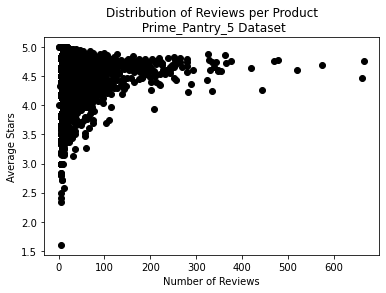

In [13]:
# Plot Scores
avg = np.array([np.mean(value) for key, value in overall_score_dict.items()])
count = np.array([np.size(value) for key, value in overall_score_dict.items()])

fig, ax = plt.subplots(1, 1)
ax.scatter(count,avg, c='k')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Average Stars')
ax.set_title(f'Distribution of Reviews per Product\n {dat_files[1]} Dataset')

plt.show()

In [14]:
# Best and Worst Products by stars

# bob = [len(overall_score_dict[k]) for k in sorted(overall_score_dict, key=lambda k: len(overall_score_dict[k]), reverse=True)]
sorted_score_freq_dict = {k: len(overall_score_dict[k]) for k in sorted(overall_score_dict, key=lambda k: len(overall_score_dict[k]), reverse=True) }
sorted_score_mean_dict = {k: np.mean(overall_score_dict[k]) for k in sorted(overall_score_dict, key=lambda k: np.mean(overall_score_dict[k]), reverse=True) }
sorted_score_std_dict = {k: np.std(overall_score_dict[k]) for k in sorted(overall_score_dict, key=lambda k: np.std(overall_score_dict[k]), reverse=True) }
sorted_score_med_dict = {k: np.median(overall_score_dict[k]) for k in sorted(overall_score_dict, key=lambda k: np.median(overall_score_dict[k]), reverse=True) }

# sorted_score_dict = {k: {'freq': len(overall_score_dict[k]),
#                          'mean': np.mean(overall_score_dict[k]),
#                          'std': np.std(overall_score_dict[k]),
#                          'median': np.median(overall_score_dict[k])}
#                     for k in sorted(overall_score_dict, key=lambda k: len(overall_score_dict[k]), reverse=True) }

# for key, value in overall_score_dict.items()
#     avg = np.array([np.mean(value) ])

In [49]:
overall_score_dict

{'B0000DIWNI': array([4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 1]),
 'B00032E8XK': array([3, 4, 5, 5, 5, 3, 4, 5, 3, 5, 2, 5, 5, 5, 5, 5, 3, 4, 5, 1, 5, 3,
        5, 5, 4, 5, 5, 5, 5, 5, 3, 3, 5, 2, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
        1, 5, 2, 5, 4, 5, 5, 5, 5, 5, 4, 3, 4, 4, 2, 5, 1, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 3, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 2, 5, 1, 5, 5,
        3, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 1, 5, 5, 5,
        5, 4, 5, 5, 5, 5, 5, 2, 3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 2, 4, 5, 5, 4, 1, 5, 5, 4, 5, 5, 5,
        5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 3, 3, 5, 5, 5,
        5, 5, 5, 5, 1, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 4, 5, 4, 1, 5, 3, 4,
        5, 1, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 5, 5]),
 'B00099XO3W': array([5, 5, 5, 1, 5, 5, 4, 4, 4, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5,
        5, 5, 4, 5, 3, 5, 5,

In [15]:
def get_product_title_from_meta(asin_in, atitle_list):
    product_title = ''
    try:
        for atl in atitle_list:
            if asin_in == atl[0]:
                return atl[1]
    except Exception as e:
        print(f'{e}')

    return product_title


product_name = get_product_title_from_meta('B0000DIWNI', asin_to_title)
print(product_name)

Saran Premium Plastic Wrap, 100 Sq Ft


In [16]:

sorted_ids_freq = list(sorted_score_freq_dict.keys())
print(f'Most reviewed items: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_freq[:10]]}')
print(f'Least reviewed Items: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_freq[-10:]]}\n')

sorted_ids_mean = list(sorted_score_mean_dict.keys())
print(f'Highest Average Ratings: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_mean[:10]]}')
print(f'Lowest Average Ratings: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_mean[-10:]]}\n')

sorted_ids_std = list(sorted_score_std_dict.keys())
print(f'Least Consistent Ratings (standard deviation): {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_std[:10]]}')
print(f'Most Consistent Ratings (standard deviation): {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_std[-10:]]}\n')

sorted_ids_med = list(sorted_score_med_dict.keys())
print(f'Highest Median Ratings: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_med[:10]]}')
print(f'Lowest Median Ratings: {[get_product_title_from_meta(sf, asin_to_title) for sf in sorted_ids_med[-10:]]}\n')



Most reviewed items: ["Mott's Unsweetened Applesauce, 3.9 Ounce Cup, 6 Count", 'Planters Nutrition Cashews, Almonds, Macadanias 9.75 oz', 'Tide Original Scent HE Turbo Clean Liquid Laundry Detergent, 64 loads, 100 fl oz (Packaging May Vary)', "Glad Press'n Seal Food Plastic Wrap - 70 Square Foot Roll", ' Nutella Hazelnut Spread, 13 Ounce Jar', 'Kellogg&rsquo;s Rice Krispies Treats, Crispy Marshmallow Squares, Original, Value Pack, 0.78 oz Bars&nbsp;(16 Count)', 'VIVA Choose-A-Sheet Paper Towels White Regular Roll 6 Count, Cloth-Like Texture, Strong &amp; Soft Paper Towels for Ultimate Clean', 'Band-Aid Brand Sheer Strips Adhesive Bandages for First Aid and Wound Care, All One Size, 80 ct', 'Method All-Purpose Cleaner, French Lavender, 28 Ounce', 'Scotch-Brite Heavy Duty Scrub Sponge, 3-Sponges']
Least reviewed Items: ['Smead Step Index Poly Organizer with 12 Pockets, Letter Size, Black (70901)', "EL Fudge Kellogg's Elfwich Cookies, Vanilla, 13.6 Ounce", "Kellogg's Nutri-Grain Kellogg's

In [27]:
review_per_asin_dict[item_list[0]]

recommended_reviews_per_item = {}
for key, review_per_product in tqdm(review_per_asin_dict.items()):
    tmp_list = []
    for fr in review_per_product:
        if 'vote' in list(fr.keys()):
            # print(fr['vote'])
            try:
                tmp_list.append(fr)
            except:
                pass
    recommended_reviews_per_item[key] = tmp_list

klist = list(recommended_reviews_per_item.keys())

for item_tmp in klist[:5]:
    for i, rt in enumerate(recommended_reviews_per_item[item_tmp][:5]):
        print(f'Review # {i}')
        print(rt)
        print('----------------------------- ')

100%|██████████| 4970/4970 [00:00<00:00, 85987.85it/s]


TypeError: unhashable type: 'list'

In [29]:
for item_tmp in klist[:5]:
    for i, rt in enumerate(recommended_reviews_per_item[item_tmp][:5]):
        print(f'Review # {i}')
        print(rt)
        print('----------------------------- ')

Review # 0
{'overall': 3.0, 'vote': '3', 'verified': True, 'reviewTime': '08 10, 2011', 'reviewerID': 'A2B0ZJ5CYX49TN', 'asin': 'B00032E8XK', 'reviewerName': 'Manu', 'reviewText': "...but it is edible.  I like the super saver free shipping mainly, otherwise I would purchase another brand.  This is emergency lunch that conveniently gets shipped directly to my office, where I keep it for when I do not have time to step out, but need to have protein.  Most cans are fine, but every now and then, you get a funky can of tuna, which doesn't look right.", 'summary': 'Not the best', 'unixReviewTime': 1312934400}
----------------------------- 
Review # 1
{'overall': 3.0, 'vote': '2', 'verified': True, 'reviewTime': '09 27, 2017', 'reviewerID': 'A2I6KBFBFIORH7', 'asin': 'B00032E8XK', 'reviewerName': 'edcaroleg', 'reviewText': 'When I was younger and still working, I used to eat a can of this "Chicken of the Sea Tuna Chunk Light in Water" every day for lunch. It was excellent, the best of several 

In [46]:
dict_key = 'vote'

num_votes_dict = {}
for product in list(recommended_reviews_per_item.keys()):
    key_list_formap = [dict_key] * len(recommended_reviews_per_item[product])
    overall_scores = map(get_field, recommended_reviews_per_item[product], key_list_formap)
    num_votes_dict[product] = np.array(list(overall_scores), dtype=int)

In [60]:
num_votes_dict

{'B0000DIWNI': array([], dtype=int32),
 'B00032E8XK': array([ 3,  2,  2, 16,  2,  2,  3,  3,  6,  2,  9]),
 'B00099XO3W': array([7, 7, 3, 2, 4, 2, 2]),
 'B00099XO5U': array([], dtype=int32),
 'B00099XPP4': array([], dtype=int32),
 'B00099XNXS': array([2, 2, 4, 2, 2, 5, 3, 4, 3, 2, 2, 5, 3]),
 'B00099XP4A': array([], dtype=int32),
 'B00099XPMC': array([], dtype=int32),
 'B00099XPMM': array([], dtype=int32),
 'B00099XO50': array([3]),
 'B00099XPD6': array([ 2,  3,  3, 27,  3,  2,  2,  2,  2,  2,  2,  4,  5,  2,  4,  2]),
 'B00099XPNQ': array([], dtype=int32),
 'B00099XLXU': array([ 2, 14,  5,  3]),
 'B000GCHLWC': array([ 2,  6,  3,  4,  2, 25]),
 'B000GGJDNI': array([12, 13, 15, 10, 14, 10, 13]),
 'B000HDCNAU': array([ 2,  2,  4, 13,  3,  2,  2,  5,  5]),
 'B000KEIPC6': array([], dtype=int32),
 'B000OUYNC2': array([3]),
 'B000OUYN5Y': array([2, 2, 2, 2, 5, 6]),
 'B000OV4FY2': array([3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2]),
 'B000P6L52Q': array([3]),
 'B000PKJB6Y': array([], dtype=int3

In [86]:
sorted_recommended_reviews = {}
for product, review_list in recommended_reviews_per_item.items():
    if len(review_list) == 0:
        continue

    sorted_recommended_reviews[product] = [review_list[i] for i in np.argsort(num_votes_dict[product])][::-1]

In [87]:
sorted_recommended_reviews

{'B00032E8XK': [{'image': ['https://images-na.ssl-images-amazon.com/images/I/61Y0t-GZnUL._SY88.jpg',
    'https://images-na.ssl-images-amazon.com/images/I/71q+GhkgsUL._SY88.jpg'],
   'overall': 3.0,
   'vote': '16',
   'verified': True,
   'reviewTime': '06 12, 2015',
   'reviewerID': 'ATJN4KEHJBOC8',
   'asin': 'B00032E8XK',
   'reviewerName': 'KatyKatMidwest',
   'reviewText': "I was going to write a review after it arrived, because I loved how it was packaged. But I decided to hold off and try it first.\nGlad I did!\n\nFirst of all, this is a great item to take camping or hiking. If you have a cat, these are about the same size as a can of Fancy Feast.\nThey are small, compact and pop-top.  They are great for putting into your prepping supplies as well - good source of protein.\nI like tuna and thought this would be a great thing for me to also keep upstairs for lunches (mobility problems restrict my access to the kitchen).\n\nWell, I have to be honest. It isn't very good.\nThe tuna

In [ ]:
def sort_helpful_reviews(review_per_asin_dict):
    sorted_recommended_reviews = {}
    try:
        
        recommended_reviews_per_item = {}
        for key, review_per_product in tqdm(review_per_asin_dict.items()):
            tmp_list = []
            for fr in review_per_product:
                if 'vote' in list(fr.keys()):
                    # print(fr['vote'])
                    try:
                        tmp_list.append(fr)
                    except:
                        pass
            recommended_reviews_per_item[key] = tmp_list


        num_votes_dict = {}
        for product in list(recommended_reviews_per_item.keys()):
            key_list_formap = ['vote'] * len(recommended_reviews_per_item[product])
            overall_scores = map(get_field, recommended_reviews_per_item[product], key_list_formap)
            num_votes_dict[product] = np.array(list(overall_scores), dtype=int)

        for product, review_list in recommended_reviews_per_item.items():
            if len(review_list) == 0:
                continue

            sorted_recommended_reviews[product] = [review_list[i] for i in np.argsort(num_votes_dict[product])][::-1]
    except Exception as e:
        print(f'Unable to Sort Recommended Reviews')
    return sorted_recommended_reviews

In [7]:
# full_review = [json.loads(txt) for txt in texts]
# print(full_review[0]['reviewText'])
# review_text = [fr['reviewText'] for fr in full_review]
review_text = []
for fr in full_review:
    try:
        review_text.append(fr['reviewText'])
    except:
        pass
print(f'Extracted {len(review_text)} text reviews')

I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .

This is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.

Now if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..


In [8]:
print(f'Extracted {len(review_text)} text reviews')

Extracted 137611 text reviews


In [93]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Sentences we want to encode. Example:
sentence = ['This framework generates embeddings for each input sentence']

#Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)

Downloading: 100%|██████████| 190/190 [00:00<00:00, 191kB/s]
Downloading: 100%|██████████| 3.69k/3.69k [00:00<00:00, 3.72MB/s]
Downloading: 100%|██████████| 122/122 [00:00<00:00, 122kB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:10<00:00, 8.80MB/s]  
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 53.1kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 112kB/s]
Downloading: 100%|██████████| 466k/466k [00:01<00:00, 371kB/s]  
Downloading: 100%|██████████| 314/314 [00:00<00:00, 325kB/s]
Downloading: 100%|██████████| 232k/232k [00:01<00:00, 231kB/s]  
Downloading: 100%|██████████| 229/229 [00:00<00:00, 237kB/s]


In [11]:
review_embeddings_dict = {}
save_keys = ['overall', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'unixReviewTime']
for fr in full_review:
    #Sentences are encoded by calling model.encode()
    try:
        sentence = fr['reviewText']
        review_embeddings_dict['embedding'] = model.encode(sentence)
        for k in save_keys:
            try:
                review_embeddings_dict[k] = fr[k]
            except:
                pass
    except:
        print('Failed to extract embedding')



print(f'Extracted {len(review_embeddings)} text embeddings')

Extracted 137611 text embeddings


In [94]:
full_review

[{'overall': 4.0,
  'verified': True,
  'reviewTime': '09 24, 2015',
  'reviewerID': 'A31Y9ELLA1JUB0',
  'asin': 'B0000DIWNI',
  'reviewerName': 'Her Royal Peepness Princess HoneyBunny Blayze',
  'reviewText': "I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .\n\nThis is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.\n\nNow if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..",
  'summary': 'Pretty Good For plastic Wrap',
  'unixReviewTime': 1443052800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '06 23, 2015',
  'reviewerID': 'A2FYW9VZ0AMXKY',
  'asin': 'B0000DIWN

In [91]:
# np_save_file = 'C:\ASTRI\Sandbox\Amzn_data\MiniLM-L6-v2_embeddings_Pantry.npy'
embeddings_save_list = ['', 'MiniLM-L6-v2_embeddings_Pantry', '']
np_save_file = osp.join(data_dir,  embeddings_save_list[1] + '.npy')

# with open(np_save_file, 'wb') as sf:
#     np.save(sf, np.array(review_embeddings))

with open(np_save_file, "rb") as f:
    loaded_embeddings = np.load(f)
print(f'Loaded embeddings with shape: {np.shape(loaded_embeddings)}')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [18]:
bob = np.array(review_embeddings[0:5])
np.shape(bob)

(5, 384)

In [20]:
from sentence_transformers.util import semantic_search
import torch


# query_embeddings = review_embeddings[0]
# dataset_embeddings = review_embeddings[1:100]

query_embeddings = torch.from_numpy(np.array(review_embeddings[0:5])).to(torch.float)
dataset_embeddings = torch.from_numpy(np.array(review_embeddings[6:100])).to(torch.float)


hits = semantic_search(query_embeddings, dataset_embeddings, top_k=5)

top_k_hits = [review_text[hits[0][i]['corpus_id']] for i in range(len(hits[0]))]
top_k_hits


['Thanks',
 'Have been using saran wrap for many years. I prefer the 100 sq. ft. size since it is so easy to grab and hold when I need it.',
 'really good',
 'Good wrap, keeping it in the fridge makes it easier to tear. Learned this trick from my sister.',
 'good']

In [37]:
from transformers import pipeline

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Downloading: 100%|██████████| 39.0/39.0 [00:00<00:00, 39.4kB/s]
Downloading: 100%|██████████| 872k/872k [00:01<00:00, 716kB/s] 
Downloading: 100%|██████████| 112/112 [00:00<00:00, 112kB/s]
Downloading: 100%|██████████| 669M/669M [00:35<00:00, 19.0MB/s]   


In [43]:
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

[{'label': '5 stars', 'score': 0.8546808362007141},
 {'label': '1 star', 'score': 0.6346077919006348}]

In [44]:
sentiment_pipeline(review_text[:10])



[{'label': '3 stars', 'score': 0.3664948046207428},
 {'label': '5 stars', 'score': 0.8478087186813354},
 {'label': '4 stars', 'score': 0.5773074626922607},
 {'label': '3 stars', 'score': 0.6787389516830444},
 {'label': '5 stars', 'score': 0.5065226554870605},
 {'label': '5 stars', 'score': 0.5827867984771729},
 {'label': '4 stars', 'score': 0.6546801924705505},
 {'label': '5 stars', 'score': 0.8083640336990356},
 {'label': '5 stars', 'score': 0.6559818387031555},
 {'label': '4 stars', 'score': 0.49696311354637146}]

In [42]:
review_text[:10]

["I purchased this Saran premium plastic wrap after trying Reynolds press and seal wrap which I would never use again.. There is less static cling to this wrap than I remember. To me this is a good thing because it doesn't stick to its self .\n\nThis is my typical complaint with all plastic wraps. When trying to cut them they ball all up and are useless. However they have improved this. Now Saran clings to the bowl or plate you wish to cover.\n\nNow if only they could improve the cutters on the boxes so  that the cutters actually cut and scissors weren't required would be better..",
 "I am an avid cook and baker.  Saran Premium Plastic Wrap is a staple in my pantry and the only plastic wrap I purchase.  I have tried other brands including Glad and have consistently found Saran Wrap to be far superior.\n\nSaran Wrap is easy to use.  It's cutting bar cuts the wrap smoothly and the end of the wrap is easy to remove from the roll, doesn't get all sticky and impossible to remove like on som

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

tokenized_datasets = map(tokenize_function, review_text[:10])

In [1]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

NameError: name 'tokenizer' is not defined

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [8]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class AmazonLetters_Dataset(Dataset):
    def __init__(self, sequence, target):
        self.sequence = sequence
        self.target = target


    def __len__(self):
        return len(self.sequence)

    def __getitem__(self, idx):
        input = torch.from_numpy(self.sequence[idx]).type(torch.LongTensor)
        target = torch.from_numpy(self.target[idx]).type(torch.LongTensor)

        return input, target

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

list